**1. Library Imports**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import requests
from PIL import Image
from io import BytesIO

**2. Data Exploration**

In [33]:
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

print(df.head(10))
print(df.isnull().sum())
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

**3. Data Preprocessing**

In [34]:
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**4. Implementing KNN Classifier**

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix for KNN:')
print(conf_matrix_knn)

KNN Accuracy: 0.9473684210526315
Confusion Matrix for KNN:
[[68  3]
 [ 3 40]]


**5. Experimenting with Different Values of n_neighbors**

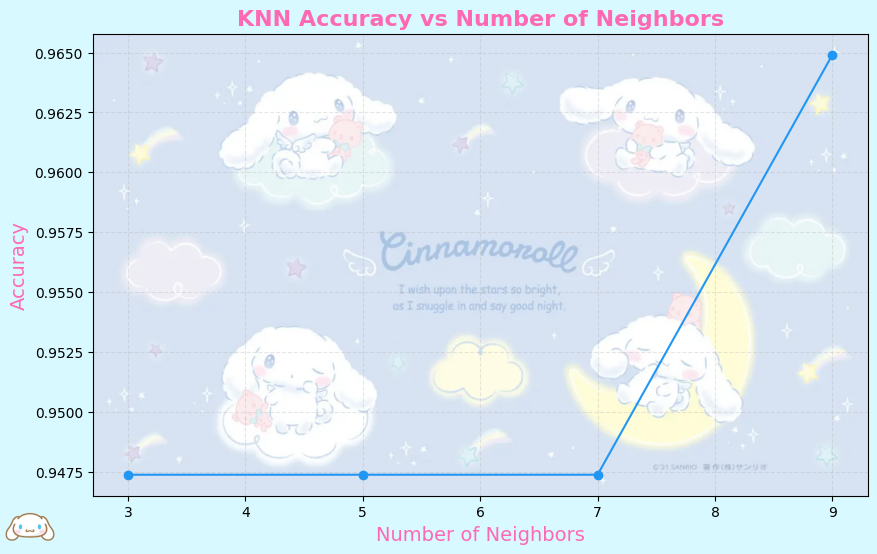

Optimal value of n_neighbors: 9


In [36]:
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(facecolor='#d8f9ff', figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o', color='#2196f3')
plt.xlabel('Number of Neighbors', fontsize=14, color='#FF69B4')
plt.ylabel('Accuracy', fontsize=14, color='#FF69B4')
plt.title('KNN Accuracy vs Number of Neighbors', fontsize=16, weight='bold', color='#FF69B4')
plt.grid(True, linestyle='--', alpha=0.3)

image_url = "https://i.postimg.cc/LXGJw9kc/cinnamoroll.webp"
response = requests.get(image_url)
main_image = Image.open(BytesIO(response.content))

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

plt.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.7, aspect='auto')

sticker_url = "https://i.postimg.cc/VLqJZcJh/cinnaface.png"
response = requests.get(sticker_url)
sticker_image = Image.open(BytesIO(response.content))

sticker = sticker_image.resize((60, 60))

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

optimal_n = neighbors[accuracies.index(max(accuracies))]
print(f'Optimal value of n_neighbors: {optimal_n}')

**6. Implementing Logistic Regression Classifier**

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print('Confusion Matrix for Logistic Regression:')
print(conf_matrix_log_reg)

class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print('Classification Report for Logistic Regression:')
print(class_report_log_reg)

Logistic Regression Accuracy: 0.9736842105263158
Confusion Matrix for Logistic Regression:
[[70  1]
 [ 2 41]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**7. Comparison of KNN and Logistic Regression**

In [38]:
print(f'KNN Accuracy: {accuracy_knn}')
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print('Classification Report for KNN:')
print(classification_report(y_test, y_pred_knn))
print('Classification Report for Logistic Regression:')
print(class_report_log_reg)

KNN Accuracy: 0.9473684210526315
Logistic Regression Accuracy: 0.9736842105263158
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**8. Grid Search for Hyperparameter Tuning**

In [39]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_}')

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best accuracy: 0.9648351648351647


**9. Cross-Validation for Logistic Regression**

In [40]:
cv_scores = cross_val_score(LogisticRegression(), X_scaled, y, cv=5)
print(f'Cross-validated accuracy for Logistic Regression: {cv_scores.mean()}')

Cross-validated accuracy for Logistic Regression: 0.9806862288464524


**10. Visualizing the Decision Boundary**

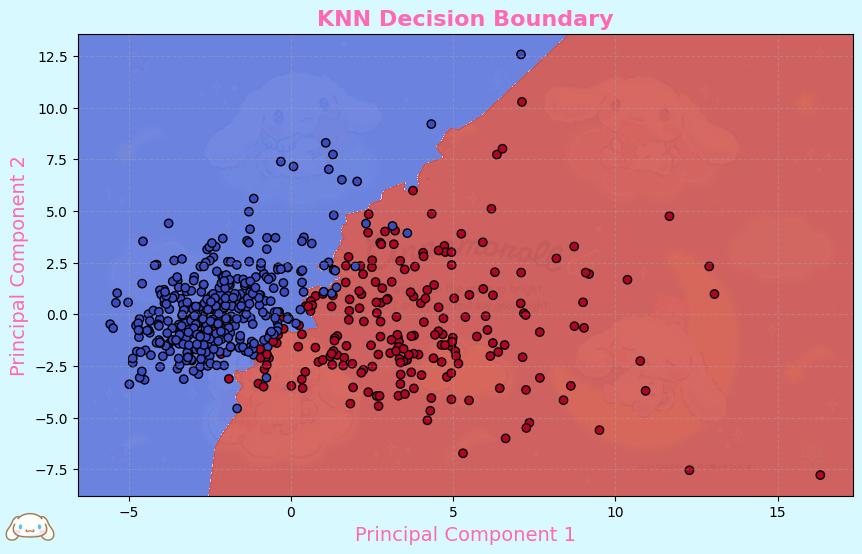

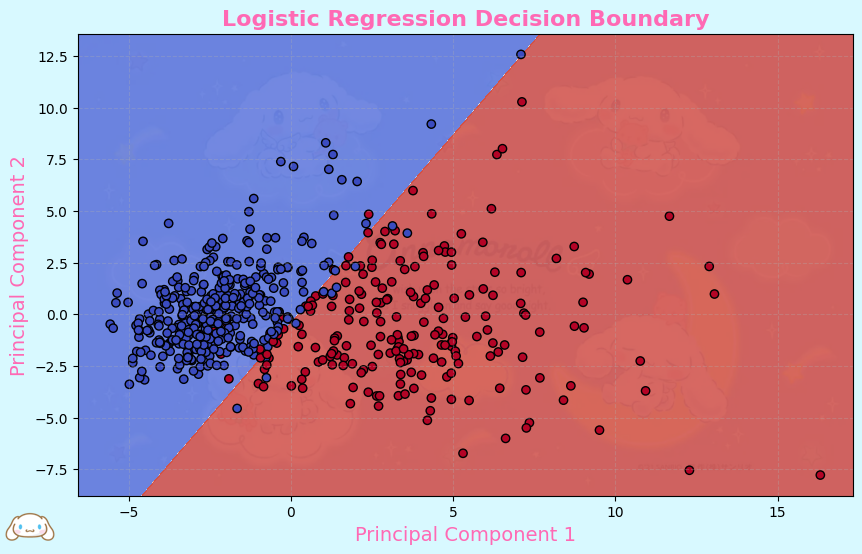

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=optimal_n)
knn_pca.fit(X_train_pca, y_train_pca)

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train_pca)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_knn = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

plt.figure(facecolor='#d8f9ff', figsize=(10, 6))
plt.contourf(xx, yy, Z_knn, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('KNN Decision Boundary', fontsize=16, weight='bold', color='#FF69B4')
plt.xlabel('Principal Component 1', fontsize=14, color='#FF69B4')
plt.ylabel('Principal Component 2', fontsize=14, color='#FF69B4')
plt.grid(True, linestyle='--', alpha=0.3)

plt.imshow(main_image, extent=(x_min, x_max, y_min, y_max), alpha=0.7, aspect='auto')

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

Z_log_reg = log_reg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)

plt.figure(facecolor='#d8f9ff', figsize=(10, 6))
plt.contourf(xx, yy, Z_log_reg, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary', fontsize=16, weight='bold', color='#FF69B4')
plt.xlabel('Principal Component 1', fontsize=14, color='#FF69B4')
plt.ylabel('Principal Component 2', fontsize=14, color='#FF69B4')
plt.grid(True, linestyle='--', alpha=0.3)

plt.imshow(main_image, extent=(x_min, x_max, y_min, y_max), alpha=0.7, aspect='auto')

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()